# Topic
**ㄴ Equipmetn Anomaly Diagnosis and Prediction Using Sensor Data**

>**CONTEXT**

* 1️⃣ Explore situations and data
* 2️⃣ Define problem-solving-process
* 3️⃣ Define abnormal situation & EDA
* 4️⃣ Rule-Based Abnormaly Diagnosis
* 5️⃣ ML-based Abnormaly Diagnosis and Prediction

#### **Import Packages**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## **1️⃣ Explore situations and data**
---
>#### **Situation & Problems** 👷
```The factory is facing challenges due to a recently introduced piece of equipment. ```

```Continuous breakdowns of the new equipment are causing disruptions in production schedules. ```

```Given the nature of this equipment, a single breakdown halts the entire production line, creating a bottleneck in the process.```

```Since breakdowns result in significant losses, it is crucial to detect early signs of abnormalities and minimize losses through proactive inspections.```


---
>#### **Explore data** 👷
 * In order to capture abnormalities in the equipment, four collision sensors (S1 to S4) have been installed at specific locations on the equipment.
 * When a collision occurs at a specific sensor location, the mass (M) and velocity (V) at the time of collision are recorded.
 * If a specific abnormal impact (M*V) is applied to the equipment, it will come to a stop.


---
>#### **Data load**

In [2]:
! git clone https://github.com/skawogur1234567/githubdesktop.git

fatal: destination path 'githubdesktop' already exists and is not an empty directory.


In [3]:
df_features = pd.read_csv('abnormal_features.csv')
df_features.head(3)

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000004,0.0,0.0,0.0,0.0
2,0,0.000008,0.0,0.0,0.0,0.0


In [4]:
df_target = pd.read_csv('abnormal_target.csv')
df_target.head(3)

,id,X,Y,M,V
0,0,0.0,-400.0,50.0,0.4
1,1,400.0,0.0,100.0,1.0
2,2,-300.0,-200.0,25.0,0.4


>df_features
* In df_features dataset, values of S1 to S4 collected from the sensors are recorded hourly.

>df_target
* In df_target dataset contains records of the final mass (M) and velocity (V) transmitted to the equipment.
* X : position of sensor
* Y : position of sensor

## **2️⃣ Define problem-solving-process**
---
> Define problem

 - Equipment breakdown causing Line stoppage, 
 - production schedule delays, 
 - revenue decrease, 
 - operating profit decrease

> Expectation

 - Reduction in Line stoppage due to proactive detection and inspection of abnormalities
 - normalization of production schedules

> Solution

 - Define abnormalities based on data, capture abnormalities through sensor data monitoring, and conduct real-time inspections

 - Definition of abnormal symptoms before breakdown occurs

 - Rule-Based Abnormal diagnosis
 
 - Prediction of abnormal symptoms through modeling

> Evalutation

 - Comparison of product production volume and Line stoppage frequency before and after abnormality monitoring


> Implemented in industrial site

 - Establishment of real-time sensor data collection and DB loading system
 - Embedding data models on servers and executing at specific time intervals, storing results
 - Outputting results data to dashboards and BI systems for monitoring

## **3️⃣ Define abnormal situation & EDA**

### EDA

In [5]:
print(f'df_features.shape : {df_features.shape}')
print(f'df_target.shape : {df_target.shape}')

df_features.shape : (1050000, 6)
df_target.shape : (2800, 5)


In [6]:
print(df_features.info())
print('='*50)
print(df_target.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   id      1050000 non-null  int64  
 1   Time    1050000 non-null  float64
 2   S1      1050000 non-null  float64
 3   S2      1050000 non-null  float64
 4   S3      1050000 non-null  float64
 5   S4      1050000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 48.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2800 non-null   int64  
 1   X       2800 non-null   float64
 2   Y       2800 non-null   float64
 3   M       2800 non-null   float64
 4   V       2800 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 109.5 KB
None


In [7]:
print(df_features.isna().sum())
print('='*50)
print(df_target.isna().sum())

id      0
Time    0
S1      0
S2      0
S3      0
S4      0
dtype: int64
id    0
X     0
Y     0
M     0
V     0
dtype: int64


In [8]:
print(df_features.isnull().sum())
print('='*50)
print(df_target.isnull().sum())

id      0
Time    0
S1      0
S2      0
S3      0
S4      0
dtype: int64
id    0
X     0
Y     0
M     0
V     0
dtype: int64


In [9]:
print('df_features_unique_id :', df_features['id'].nunique())
print('df_target_unique_id :', df_target['id'].nunique())

df_features_unique_id : 2800
df_target_unique_id : 2800


In [10]:
df_features[df_features['id']==0].head(5)

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000004,0.0,0.0,0.0,0.0
2,0,0.000008,0.0,0.0,0.0,0.0
3,0,0.000012,0.0,0.0,0.0,0.0
4,0,0.000016,0.0,0.0,0.0,0.0


In [11]:
df_features_proc = df_features.groupby('id').mean()

In [12]:
df_features.groupby('id').mean()

,Time,S1,S2,S3,S4
id,,,,,
0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893
1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221
2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340
3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867
4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287
...,...,...,...,...,...
2795,0.000748,5600.614397,5885.824925,-6380.192826,-7357.437798
2796,0.000748,-1215.328099,2702.879683,805.983784,-2876.150150
2797,0.000748,436.239993,276.327514,951.805606,-903.193922


In [13]:
print('df_features', df_features_proc.shape)
print('df_target', df_target.shape)

df_features (2800, 5)
df_target (2800, 5)


In [14]:
df_merge = pd.merge(df_features_proc, df_target, on='id',how='left')

In [15]:
df_merge.head(5)

,id,Time,S1,S2,S3,S4,X,Y,M,V
0,0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893,0.0,-400.0,50.0,0.4
1,1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221,400.0,0.0,100.0,1.0
2,2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340,-300.0,-200.0,25.0,0.4
3,3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867,200.0,-100.0,150.0,0.4
4,4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287,-300.0,-100.0,150.0,0.4


In [16]:
df_merge=df_merge.drop(['Time', 'X', 'Y'], axis=1)
df_merge.head(5)

,id,S1,S2,S3,S4,M,V
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4


### Define abnormal
---
* Define abnormal conditions for pre-inspection before equipment failure
* Conduct pre-inspection when the equipment reaches abnormal conditions

* final collision energy = M * V (Mass * Velocity)

In [17]:

df_merge['MV'] = df_merge['M'] * df_merge['V']
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0


Average Collision energy : 60.0


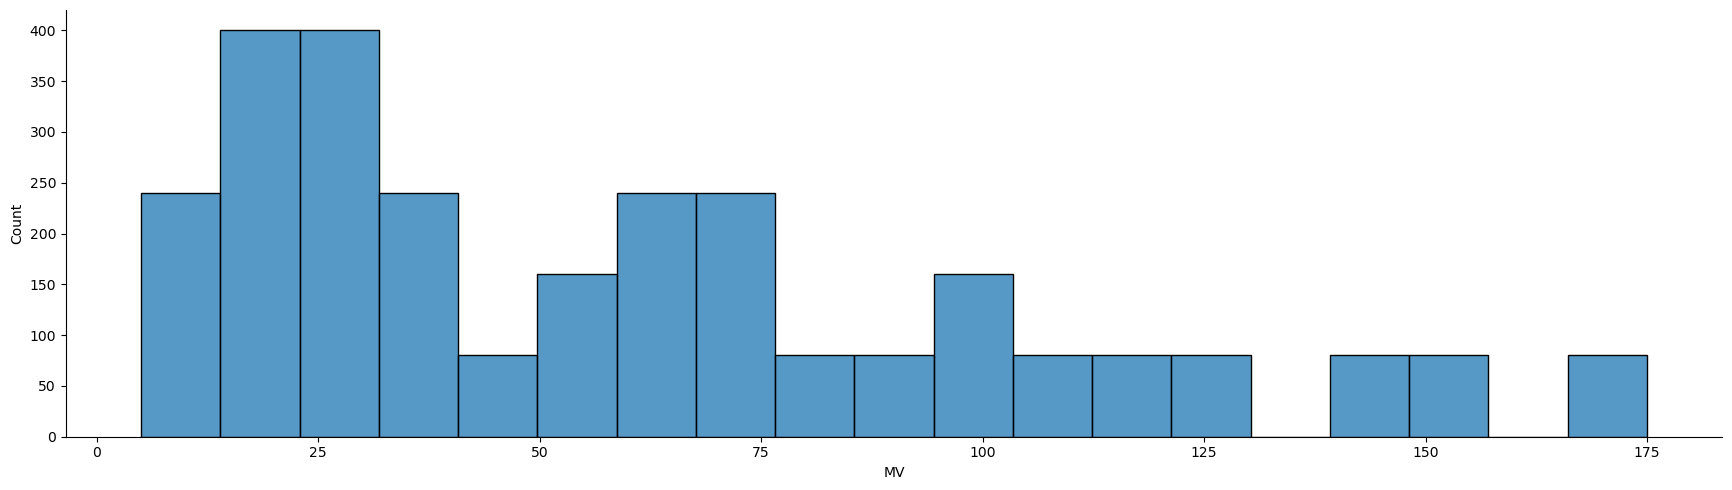

In [18]:
sns.displot(df_merge['MV']);
plt.gcf().set_size_inches(20, 5)
print("Average Collision energy :", df_merge['MV'].mean())

*  There are various methods to define abnormalities, and there is usually a standard in the industry.

* If there is no existing standard in the industry, abnormalities are often assumed to be data points that are ±1, ±2, or ±3 standard deviations (sd) from the mean.

* Define collisions with energy greater than mean + 2sd as abnormal.

In [19]:

df_merge['abnormal'] =  np.where(df_merge['MV'] > df_merge['MV'].mean() + 2*df_merge['MV'].std(), 1, 0)
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0


* Check abnormal data distribution

In [20]:
df_merge['abnormal'].value_counts()

abnormal
0    2640
1     160
Name: count, dtype: int64

In [21]:
(160/2640)*100

6.0606060606060606

* Approximately 6% show signs of abnormality.

## **4️⃣ Rule-Based Abnormaly Diagnosis**  

---

Knowledge and expertise based on industry practice

### Analysis of Abnormal Occurrence Timing
---
* Once abnormalities are defined, explore the distribution of sensor data at the time of abnormalities.
* Compare the states of abnormalities (1) and non-abnormalities (0) for each sensor (S1~S4).

▶ Sensor Data Analysis for Abnormalities

▶ Confirming differences in mean sensor values between abnormal and normal states

In [22]:
print("abnormal :",df_merge[df_merge['abnormal']==1]['S1'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S1'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S2'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S2'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S3'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S3'].mean())
print("abnormal :",df_merge[df_merge['abnormal']==1]['S4'].mean(), "/ normal : ",df_merge[df_merge['abnormal']==0]['S4'].mean())

abnormal : -910.6725618222317 / normal :  -374.457459218389
abnormal : -910.6725618222324 / normal :  -374.45745931738884
abnormal : -3662.427652993808 / normal :  -1193.247454043241
abnormal : -4473.323652485669 / normal :  -1431.8663172477716


▶ To confirm a more accurate distribution, a scatter plot is drawn.

▶ There is a trend of more abnormalities occurring as sensor values move further away from the mean.

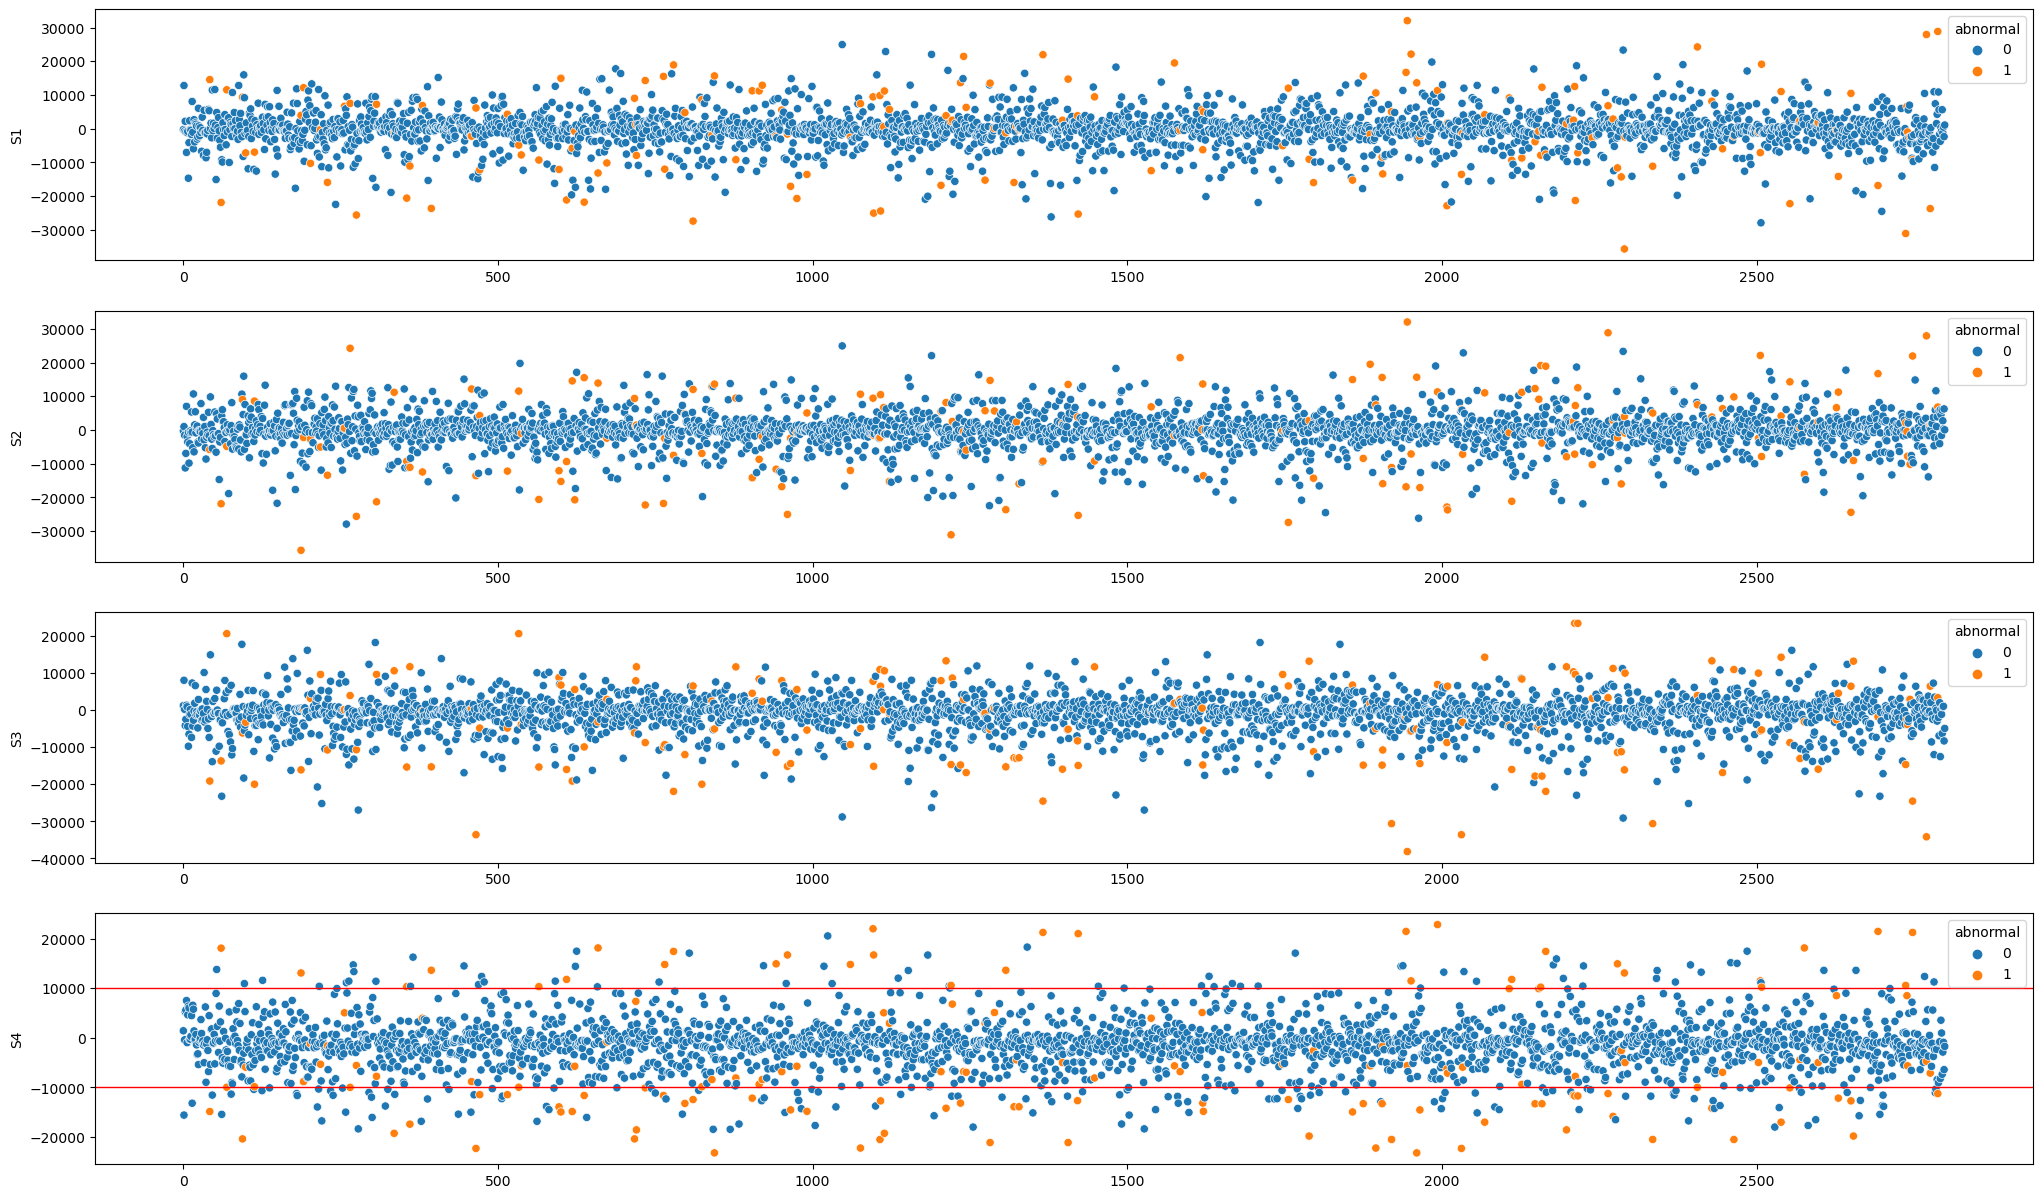

In [23]:
fig, axes = plt.subplots(4, 1)
sns.scatterplot(x=df_merge.index, y=df_merge['S1'], hue = df_merge['abnormal'], ax=axes[0]);
sns.scatterplot(x=df_merge.index, y=df_merge['S2'], hue = df_merge['abnormal'], ax=axes[1]);
sns.scatterplot(x=df_merge.index, y=df_merge['S3'], hue = df_merge['abnormal'], ax=axes[2]);
sns.scatterplot(x=df_merge.index, y=df_merge['S4'], hue = df_merge['abnormal'], ax=axes[3]);
plt.axhline(y=10000, color='r', linewidth=1)
plt.axhline(y=-10000, color='r', linewidth=1)
plt.gcf().set_size_inches(25, 15)

### · Rule-based Anomaly Diagnosis
---
* Confirm insights from scatter plot that more defects occur when each sensor value is above 10,000 or below -10,000.
* Verify numerically if there are more defects occurring compared to the actual average anomaly rate (6%).

▶ Check the defect rate for S1

In [24]:
df_s1 = df_merge[(df_merge['S1'] > 10000) | (df_merge['S1'] < -10000)]
df_s1_abnormal_ratio = (len(df_s1[df_s1['abnormal']==1]) / len(df_s1)) * 100
df_s1_abnormal_ratio

26.978417266187048

▶ Check the defect rate for S2

In [25]:
df_s2 = df_merge[(df_merge['S2'] > 10000) | (df_merge['S2'] < -10000)]
df_s2_abnormal_ratio = (len(df_s2[df_s2['abnormal']==1]) / len(df_s2)) * 100
df_s2_abnormal_ratio

26.978417266187048

▶ Check the defect rate for S3

In [26]:
df_s3 = df_merge[(df_merge['S3'] > 10000) | (df_merge['S3'] < -10000)]
df_s3_abnormal_ratio = (len(df_s3[df_s3['abnormal']==1]) / len(df_s3)) * 100
df_s3_abnormal_ratio

28.627450980392155

▶ Check the defect rate for S4

In [27]:
df_s4 = df_merge[(df_merge['S4'] > 10000) | (df_merge['S4'] < -10000)]
df_s4_abnormal_ratio = (len(df_s4[df_s4['abnormal']==1]) / len(df_s4)) * 100
df_s4_abnormal_ratio

31.333333333333336

▶ Utilize these insights to predict anomalies

▶ Predict anomalies if S1, S2, S3, S4 are above 10,000 or below -10,000

In [28]:
df_merge['rule_base1'] = np.where( ((df_merge['S1'] > 10000) | (df_merge['S1'] < -10000)) , 1, 0)
df_merge['rule_base2'] = np.where( ((df_merge['S2'] > 10000) | (df_merge['S2'] < -10000)) , 1, 0)
df_merge['rule_base3'] = np.where( ((df_merge['S3'] > 10000) | (df_merge['S3'] < -10000)) , 1, 0)
df_merge['rule_base4'] = np.where( ((df_merge['S4'] > 10000) | (df_merge['S4'] < -10000)) , 1, 0)

In [29]:
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0


▶ Precision: How trustworthy are the positive predictions? It is calculated as true positives (predicted positive and actually positive) divided by the sum of true positives and false positives (predicted positive but actually negative).

▶ Recall: It compares the number of true positive predictions to the total actual positives (true positives and false negatives). 

▶ In this context, recall is more important.

In [30]:
print(classification_report(df_merge['abnormal'], df_merge['rule_base1']))
print()
print(classification_report(df_merge['abnormal'], df_merge['rule_base2']))
print()
print(classification_report(df_merge['abnormal'], df_merge['rule_base3']))
print()
print(classification_report(df_merge['abnormal'], df_merge['rule_base4']))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800


              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2640
           1       0.29      0.46      0.35       160

    accuracy                           0.90      2800
   macro avg       0.63      0.69      0.65      2800
weighted avg       0.93      0.90      0.91      2800


              pr

## **5️⃣ ML-based Abnormaly Diagnosis and Prediction**  
---

### · Data Preparation for Modeling
---
* Split the data into features and the target variable (Y) for modeling.
* Split the data into training and testing sets for training and prediction.

In [31]:
df_merge.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0


In [32]:
X=df_merge.drop(['id', 'M', 'V', 'MV', 'rule_base1', 'rule_base2', 'rule_base3', 'rule_base4', 'abnormal'], axis=1)
Y=df_merge['abnormal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1960, 4)
(1960,)
(840, 4)
(840,)


### · Model Training and Evaluation
---
* Train the model, make predictions, and evaluate its performance.

In [33]:
# Train model
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(x_train, y_train)

# ▶ Predict
# ▶ Predictions are made on both the training data and the test data used for training, 
# and the model is evaluated to determine overfitting.

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      1.00      1.00       112

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       792
           1       0.76      0.60      0.67        48

    accuracy                           0.97       840
   macro avg       0.87      0.80      0.83       840
weighted avg       0.96      0.97      0.96       840



### · Hyperparameter Tuning
---
* Adjusting options to improve model performance.

In [34]:
params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
            }

# Create RandomForestClassifier object and execute GridSearchCV
rf_clf = RandomForestClassifier(random_state = 123456, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='recall')
grid_cv.fit(x_train, y_train)

print('best parameters: ', grid_cv.best_params_)
print('best score: {:.4f}'.format(grid_cv.best_score_))

best parameters:  {'max_depth': 10, 'n_estimators': 500}
best score: 0.3924


In [35]:
# Train again with best score parameters
rfc = RandomForestClassifier(n_estimators=500, max_depth=12, random_state = 123456)
rfc.fit(x_train, y_train)

# predict
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1848
           1       1.00      0.87      0.93       112

    accuracy                           0.99      1960
   macro avg       1.00      0.93      0.96      1960
weighted avg       0.99      0.99      0.99      1960

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       792
           1       0.76      0.58      0.66        48

    accuracy                           0.97       840
   macro avg       0.87      0.79      0.82       840
weighted avg       0.96      0.97      0.96       840



In [36]:
pd.Series(y_pred_train).value_counts()

0    1863
1      97
Name: count, dtype: int64

### · Identifying Important Variables
---
* Identifying important variables through feature importance analysis.

In [37]:
x_train.columns

Index(['S1', 'S2', 'S3', 'S4'], dtype='object')

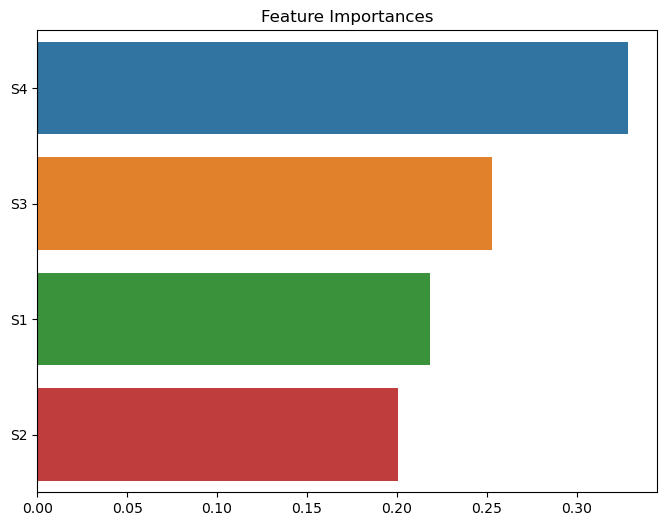

In [38]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### · Adding Variables
---
* Exploring additional variables to improve model performance.

In [39]:
df_new=df_merge.copy()

# ▶ ^2
df_new['S1_2']=df_new['S1']*df_new['S1']
df_new['S2_2']=df_new['S2']*df_new['S2']
df_new['S3_2']=df_new['S3']*df_new['S3']
df_new['S4_2']=df_new['S4']*df_new['S4']

# ▶ multiple
df_new['s1*s2']=df_new['S1']*df_new['S2']
df_new['s2*s3']=df_new['S2']*df_new['S3']
df_new['s3*s4']=df_new['S3']*df_new['S4']

df_new.head(5)

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4,S1_2,S2_2,S3_2,S4_2,s1*s2,s2*s3,s3*s4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0,9.505170e+04,9.505170e+04,1.253291e+06,1.989518e+06,9.505170e+04,-3.451484e+05,1.579065e+06
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1,1.633329e+08,9.638896e+05,6.325071e+07,2.428846e+08,1.254731e+07,7.808117e+06,-1.239460e+08
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0,4.546665e+05,2.482774e+06,1.888707e+04,1.657242e+05,1.062466e+06,-2.165463e+05,-5.594679e+04
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0,4.683835e+06,1.271195e+08,1.782307e+07,2.747176e+07,-2.440096e+07,4.759895e+07,-2.212761e+07
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0,9.613422e+05,4.853787e+07,6.531842e+06,3.132564e+07,6.830923e+06,1.780566e+07,-1.430434e+07


In [40]:
X=df_new.drop(['id', 'M', 'V', 'MV', 'rule_base1', 'rule_base2', 'rule_base3', 'rule_base4', 'abnormal'], axis=1)
Y=df_new['abnormal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1960, 11)
(1960,)
(840, 11)
(840,)


In [41]:
# ▶ Train
rfc = RandomForestClassifier(n_estimators=500, max_depth=12, random_state=123456)
rfc.fit(x_train, y_train)

# ▶ Predict
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      0.94      0.97       112

    accuracy                           1.00      1960
   macro avg       1.00      0.97      0.98      1960
weighted avg       1.00      1.00      1.00      1960

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       792
           1       0.61      0.46      0.52        48

    accuracy                           0.95       840
   macro avg       0.79      0.72      0.75       840
weighted avg       0.95      0.95      0.95       840



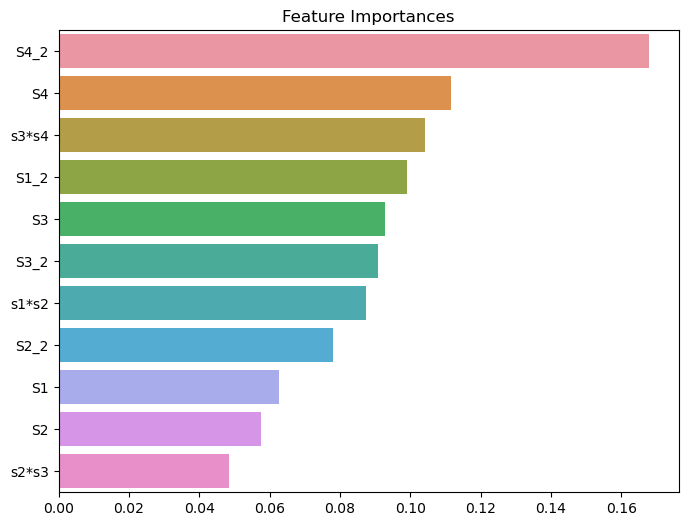

In [42]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### · Model Save and Read
---

In [43]:
saved_model = pickle.dumps(rfc)
clf_from_pickle = pickle.loads(saved_model)